In [7]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns

In [8]:
!pip install -q scikit-plot

In [9]:
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
# from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from imblearn.over_sampling import SMOTE

In [10]:
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

In [11]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.drop('Time', axis = 1, inplace = True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Performing EDA

In [12]:
print('Non Fraud items:', len(df[df.Class == 0]))
print('Fraud items:', len(df[df.Class == 1]))

Non Fraud items: 284315
Fraud items: 492


In [13]:
s = StandardScaler()
df['Amount'] = s.fit_transform(df['Amount'].values.reshape(-1, 1))

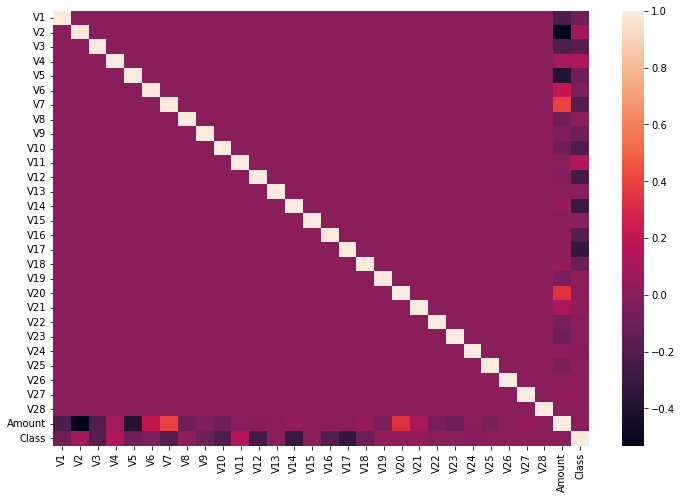

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())
# from the result below we see that the columns have very low to no correlation at all.

In [15]:
X=df.drop('Class',axis=1)
Y=df['Class']
# appling oversampling techniques as we know the data is highly imbalanced
X_resample, y_resample = SMOTE().fit_resample(X, Y)
X_resample.shape , y_resample.shape

((568630, 29), (568630,))

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X_resample.values,y_resample.values,test_size = 0.25, random_state = 38)

In [17]:
DT = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_y_pred = DT.predict(X_test)

In [18]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, dt_y_pred)))

F1 score of the Decision Tree model is 0.9392093931174651


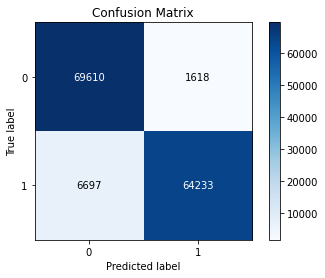

In [19]:
skplt.metrics.plot_confusion_matrix(y_test, dt_y_pred)

F1 score of the Decision Tree model is 0.945287209488002


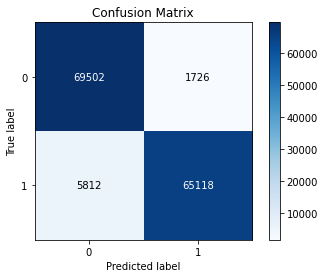

In [20]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, y_pred_LR)))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_LR)

F1 score of the Decision Tree model is 0.9615592457900656


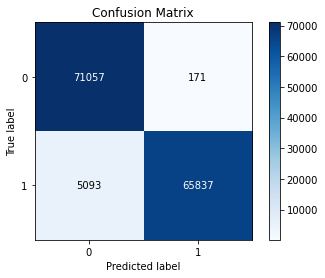

In [21]:
rf = RandomForestClassifier(max_depth = 7)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, y_pred_rf)))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf)